In [52]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import DBSCAN
import timeit

In [41]:
img = cv2.imread('runway.jpg', cv2.IMREAD_COLOR)

pixel_uncertainty = 5

# to calculate the transformation matrix
input_pts = np.float32([[176,511],[797,513],[391,391],[588,392]])
output_pts = np.float32([[-3,3],[3,3],[-3,13],[3,13]])
#output_pts = np.float32([[176,511],[797,513],[176,0],[797,0]])


# Compute the perspective transform M
H = np.float32(cv2.getPerspectiveTransform(input_pts,output_pts))
print('Homography Matrix: \n', H)

Homography Matrix: 
 [[-5.1275012e-03 -7.0846283e-05  2.5384142e+00]
 [ 8.5683478e-06  4.9511008e-03 -4.1312923e+00]
 [ 1.7854569e-05 -3.0066529e-03  1.0000000e+00]]


-0.008405858992773574


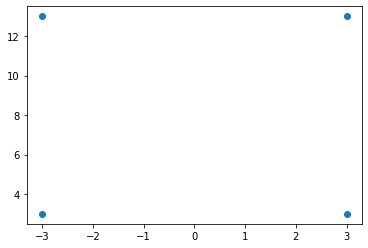

In [42]:
start = timeit.timeit()
## reshape tp (n, 1, 2)
transform_points = input_pts.reshape(-1,1,2).astype(np.float32)

#apply homography transfrom
cartesian_points = cv2.perspectiveTransform(transform_points, H)
reduced_cartesian_points = np.squeeze(cartesian_points, axis=1)

end = timeit.timeit()
print(end - start)

#plot 2d cartesian points (birds eye view)
plt.scatter(reduced_cartesian_points[:,0], reduced_cartesian_points[:,1])

In [43]:
right_error = np.float32([[176+pixel_uncertainty,511],[797+pixel_uncertainty,513],[391+pixel_uncertainty,391],[588+pixel_uncertainty,392]])
left_error = np.float32([[176-pixel_uncertainty,511],[797-pixel_uncertainty,513],[391-pixel_uncertainty,391],[588-pixel_uncertainty,392]])
top_error = np.float32([[176,511+pixel_uncertainty],[797,513+pixel_uncertainty],[391,391+pixel_uncertainty],[588,392+pixel_uncertainty]])
bottom_error = np.float32([[176,511-pixel_uncertainty],[797,513-pixel_uncertainty],[391,391-pixel_uncertainty],[588,392-pixel_uncertainty]])

In [44]:
transformed_right_error = cv2.perspectiveTransform(right_error.reshape(-1,1,2).astype(np.float32), H)
transformed_left_error = cv2.perspectiveTransform(left_error.reshape(-1,1,2).astype(np.float32), H)
transformed_top_error = cv2.perspectiveTransform(top_error.reshape(-1,1,2).astype(np.float32), H)
transformed_bottom_error = cv2.perspectiveTransform(bottom_error.reshape(-1,1,2).astype(np.float32), H)


In [45]:
reduced_transformed_right_error = np.squeeze(transformed_right_error, axis=1)
reduced_transformed_left_error = np.squeeze(transformed_left_error, axis=1)
reduced_transformed_top_error = np.squeeze(transformed_top_error, axis=1)
reduced_transformed_bottom_error = np.squeeze(transformed_bottom_error, axis=1)


In [46]:
all_transformed_points = np.vstack((reduced_cartesian_points, reduced_transformed_right_error,
                                    reduced_transformed_left_error, reduced_transformed_top_error,
                                    reduced_transformed_bottom_error))

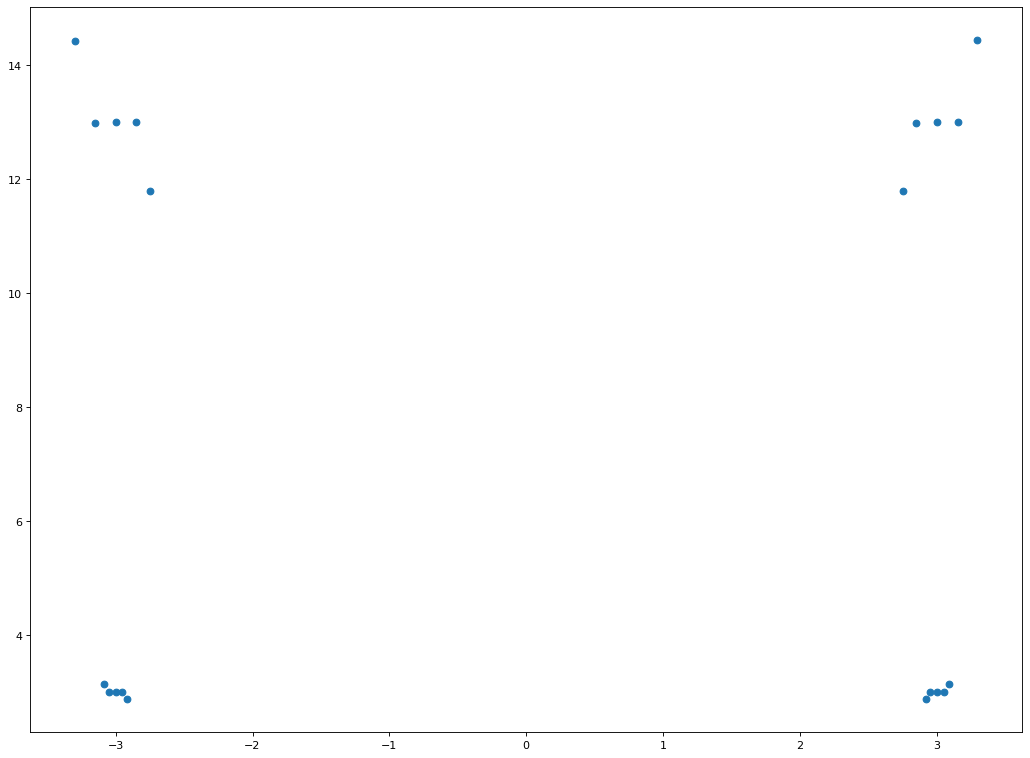

In [49]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(all_transformed_points[:,0], all_transformed_points[:,1])

In [21]:
all_transformed_points

array([[-2.952417 ,  3.000422 ],
       [ 3.049054 ,  3.000426 ],
       [-2.8494651, 13.00663  ],
       [ 3.1541789, 13.00665  ],
       [-2.952417 ,  3.000422 ],
       [ 3.049054 ,  3.000426 ],
       [-2.8494651, 13.00663  ],
       [ 3.1541789, 13.00665  ]], dtype=float32)

In [59]:
df=pd.read_csv('objects.csv', sep=',',header=None)
new_header = df.iloc[0]
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
#df.to_numpy()
df

,id,latitude,longitude,part_nmbr,serial_nmbr,information,information2,dimension,weight,origin,...,created,modified,modified_merged,crud,deleted,modified_timezone,object_categories_id,object_types_id,object_events_id,object_statuses_id
1,412404605,56.308899088861,10.626452485537,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-04-14T14:44:26,2020-06-08T11:37:36,2020-06-08T11:35:52,U,NaN,2020-06-08T11:35:52,100533,301434,500772,701063
2,412404606,56.308744100803,10.626380202476,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-04-14T14:45:25,2020-06-08T11:37:37,2020-06-08T11:37:23,U,NaN,2020-06-08T11:37:23,100533,301434,500772,701063
3,412404607,56.308898249584,10.626690002244,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-04-14T14:57:33,2020-06-08T11:37:36,2020-06-08T11:35:46,U,NaN,2020-06-08T11:35:46,100533,301434,500772,701063
4,412404608,56.308702832908,10.62662650451,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-04-14T14:57:33,2020-06-02T21:29:57,2020-06-02T21:24:45,U,NaN,2020-06-02T21:24:45,100533,301434,500772,701063
5,412404609,56.308619064994,10.626605867809,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-04-14T14:57:33,2020-06-02T21:29:57,2020-06-02T21:24:55,U,NaN,2020-06-02T21:24:55,100533,301434,500772,701063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,412449977,56.302369593071,10.630955841899,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-09-24T14:59:02,2020-09-24T14:59:02,2020-09-24T14:55:45,C,NaN,2020-09-24T14:55:45,100531,301430,500769,701070
2015,412449978,56.301697853769,10.632725692392,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-09-24T14:59:02,2020-09-24T14:59:02,2020-09-24T14:55:59,C,NaN,2020-09-24T14:55:59,100531,301430,500769,701070
2016,412449979,56.302175567752,10.632881059491,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-09-24T14:59:02,2020-09-24T14:59:02,2020-09-24T14:56:06,C,NaN,2020-09-24T14:56:06,100531,301430,500769,701070
2017,412449980,56.301406035908,10.635614189112,NaN,NaN,NaN,NaN,NaN,NaN,MobileApp,...,2020-09-24T14:59:02,2020-09-24T14:59:02,2020-09-24T14:56:32,C,NaN,2020-09-24T14:56:32,100531,301430,500769,701070
